# Introduction

<font color = "green">
<font size="4">Hello, welcome to my first notebook, where we will visualize the relationships between people who died and survived the covid virus and those who have never been infected. Finally, we will make various comments using different machine learning algorithms. So let's start.</font>
     


1. [Content](#1)
2. [Check and Load data](#2)
3. [Feature Engineering](#3)
> * [Edit and drop some futures](#18)
> * [Make logic and assigning null values ​​to a single variable](#19)
> * [Visualize which variable contains a null value](#20)
> * [Check data balance](#21)
> * [Trying to balance the data](#22)
4. [Data Visualization](#4)
5.[Final checks and preparing data](#5)
> * [Check Futures](#6)
> * [Scaling Data](#7)
> * [Separating futures and labels](#8)
6. [Train test splits and get balance the data](#9)
7. [Machine Learning](#10)
> * [Logistic Regression](#11)
> * [KNN](#12)
> * [Decision Tree](#13)
> * [Random Forest](#14)
> * [Naive Base](#15)
> * [K Fold Cross Validation with Logistic Regression](#16)
> * [Grid Search Cross Validation with Logistic Regression](#17)
8. [Conclusion](#23)

<font color = "black">
<a id ="1"></a>
    <font size="5">Content:</font></br></br></br>

    The dataset was provided by the Mexican government (link). This dataset contains an enormous number of anonymized patient-related information including pre-conditions. The raw dataset consists of 21 unique features and 1,048,576 unique patients. In the Boolean features, 1 means "yes" and 2 means "no". values as 97 and 99 are missing data.

* sex: 1 for female and 2 for male.
* age: of the patient.
* classification: covid test findings. Values 1-3 mean that the patient was diagnosed with covid in different
* degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.
* patient type: type of care the patient received in the unit. 1 for returned home and 2 for hospitalization.
* pneumonia: whether the patient already have air sacs inflammation or not.
* pregnancy: whether the patient is pregnant or not.
* diabetes: whether the patient has diabetes or not.
* copd: Indicates whether the patient has Chronic obstructive pulmonary disease or not.
* asthma: whether the patient has asthma or not.
* inmsupr: whether the patient is immunosuppressed or not.
* hypertension: whether the patient has hypertension or not.
* cardiovascular: whether the patient has heart or blood vessels related disease.
* renal chronic: whether the patient has chronic renal disease or not.
* other disease: whether the patient has other disease or not.
* obesity: whether the patient is obese or not.
* tobacco: whether the patient is a tobacco user.
* usmr: Indicates whether the patient treated medical units of the first, second or third level.
* medical unit: type of institution of the National Health System that provided the care.
* intubed: whether the patient was connected to the ventilator.
* icu: Indicates whether the patient had been admitted to an Intensive Care Unit.
* date died: If the patient died indicate the date of death, and 9999-99-99 otherwise.    



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn.metrics import confusion_matrix,r2_score,f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
warnings.filterwarnings("ignore")

<a id ="2"></a>
# Load and Check Data

In [2]:
data=pd.read_csv("/kaggle/input/covid19-dataset/Covid Data.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [4]:
data.shape

(1048575, 21)

In [5]:
data.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [6]:
data.isna().sum().sum()

0

* There are no null values ​​in the data set, but there are data that mean null values, we will look at them.

<a id ="3"></a>
# Feature engineering

* As mentioned in the data, the values ​​97, 98 and 99 are our null values. In the future, we will combine them into a single value.

In [7]:
for i in data.columns:
    print(data[i].value_counts())
    print("\n")

2    662903
1    385672
Name: USMER, dtype: int64


12    602995
4     314405
6      40584
9      38116
3      19175
8      10399
10      7873
5       7244
11      5577
13       996
7        891
2        169
1        151
Name: MEDICAL_UNIT, dtype: int64


1    525064
2    523511
Name: SEX, dtype: int64


1    848544
2    200031
Name: PATIENT_TYPE, dtype: int64


9999-99-99    971633
06/07/2020      1000
07/07/2020       996
13/07/2020       990
16/06/2020       979
               ...  
24/11/2020         1
17/12/2020         1
08/12/2020         1
16/03/2021         1
22/04/2021         1
Name: DATE_DIED, Length: 401, dtype: int64


97    848544
2     159050
1      33656
99      7325
Name: INTUBED, dtype: int64


2     892534
1     140038
99     16003
Name: PNEUMONIA, dtype: int64


30     27010
31     25927
28     25313
29     25134
34     24872
       ...  
114        2
116        2
111        1
121        1
113        1
Name: AGE, Length: 121, dtype: int64


97    523511
2     51317

<a id ="18"></a>
* First of all, let's edit futures that do not have null values ​​and are not classified.

In [8]:
data["ALIVE"]=[1 if i=="9999-99-99" else 0 for i in data["DATE_DIED"]]

* In the date died future in the data set, we assigned the value 1 to those without a date of death and 0 to those with a date of death.

In [9]:
data.drop("DATE_DIED",axis=1,inplace=True) # We don't need Date_died future anymore, we remove it from our data.

* Values ​​between 1 and 3 in the CLASIFFICATION_FINAL future are people who have been infected with the covid virus before. Those that are greater than these values ​​are people who have been tested and have negative results or whose results are unknown.
* We assign a value of 1 to our data for people who have previously been infected with the corona virus, and 0 to people who have not been infected with this virus or whose result is unknown.

In [10]:
data["INFECTED"]=[1 if each<4 else 0 for each in data["CLASIFFICATION_FINAL"]]
data.drop("CLASIFFICATION_FINAL",axis=1,inplace=True)

<a id ="19"></a>
* We make a list of column names that contain null values ​​in the data and make the data logical.

In [11]:
null_or_non_zero_list=["USMER","SEX","PATIENT_TYPE","INTUBED","PNEUMONIA","PREGNANT","DIABETES","COPD","ASTHMA","INMSUPR","HIPERTENSION","OTHER_DISEASE","CARDIOVASCULAR","OBESITY","RENAL_CHRONIC","TOBACCO","ICU"]
for each in null_or_non_zero_list:
    # We set the data with values ​​of 2 to 0 to ensure that our data is logical. Sex future => 0 = Male, 1=Female
    data[each]=data[each].replace(2,0)
    # we set the null values to 98
    data[each]=data[each].replace([97,99],98) 

<a id ="20"></a>
* Now that we have assigned our null values, let's find out how many of these values ​​are in which future.

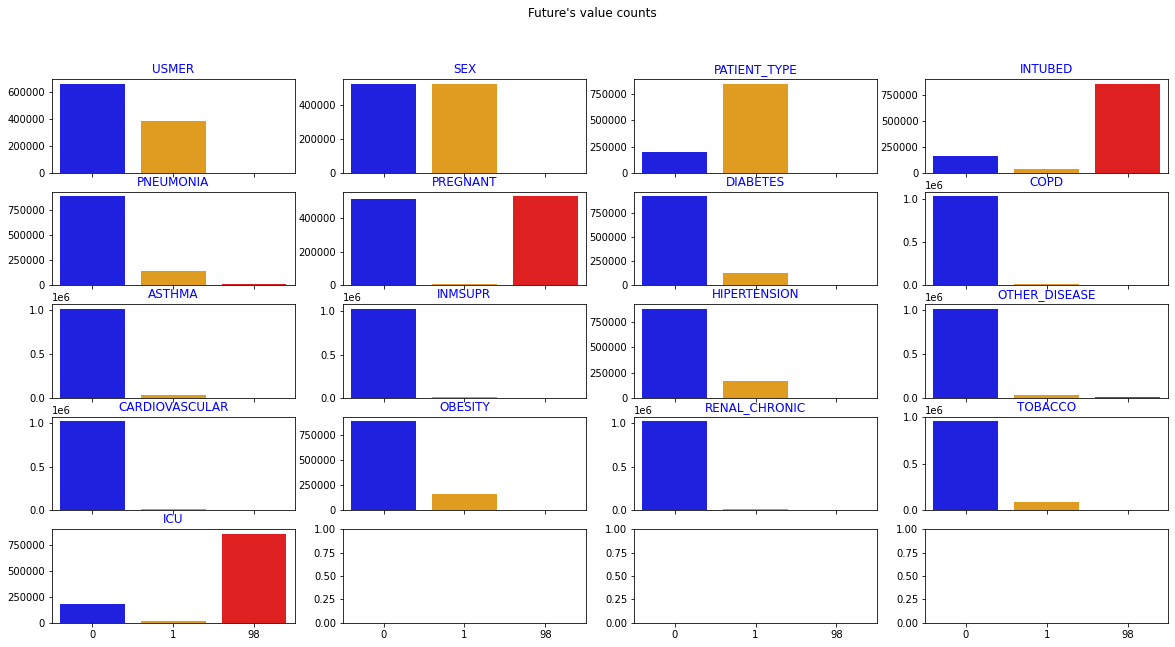

In [12]:
fig,axes=plt.subplots(5,4,sharex=True,figsize=(20,10))
fig.suptitle("Future's value counts")

a=0
b=0
for each in null_or_non_zero_list: 
    sns.barplot(ax=axes[a][b],x=data[each].value_counts().index,y=data[each].value_counts().values,palette=["blue","orange","red"])
    axes[a][b].set_title(each,color="blue")
    b+=1
    if b>3:
        a+=1
        b=0

<a id ="21"></a>
#### As seen in the graph, there are 3 futures(INTUBED,PREGNANT and ICU) with more null(98) values. We don't want to lose them. So we will need to find out which class these null values ​​belong to.
#### Of course, before we do all these, we will have to look at the values ​​of the future we will predict and determine which one is more weighted.

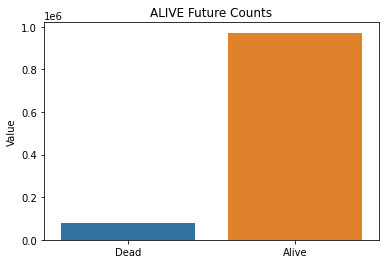

In [13]:
plt.figure()
sns.barplot(data.ALIVE.value_counts().index,data.ALIVE.value_counts().values).set(title="ALIVE Future Counts",xticklabels=(["Dead","Alive"]),ylabel="Value")
plt.show()

<a id ="22"></a>
* As you can see, this future is dominated by survivors. The alive futures of the values ​​we will find in these 3 futures(INTUBED,PREGNANT and ICU) should be 0-weighted so that our data can become more balanced.
* Let's check it out
#### We will first look at the INTUBED future.

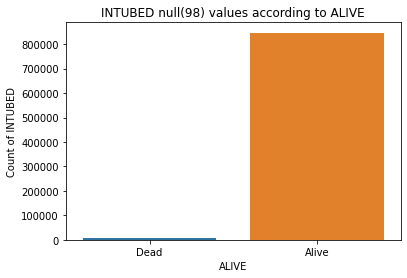

In [14]:
plt.figure()
bar=sns.barplot(x=data.ALIVE[(data.INTUBED==98)].value_counts().index,y=data.ALIVE[(data.INTUBED==98)].value_counts().values)
bar.set(title="INTUBED null(98) values ​​according to ALIVE",xticklabels=(["Dead","Alive"]),ylabel="Count of INTUBED",xlabel="ALIVE")
plt.show()

* This future is predominantly survivors and the number of nulls is high, it cannot positively affect our data, so we can remove it altogether.

In [15]:
data.drop(columns=["INTUBED"],inplace=True)
null_or_non_zero_list.remove("INTUBED")

#### We made our first future. Let's move on to the next pregnancy future.

*  First of all, let's equate the values ​​that are male and null with pregnant values ​​in our data to 0. Because a male cannot get pregnant. :)
*  We can't relate to other futures with female pregnant future and null values ​​in our data. At the same time, we can remove these data from our data because they are few in number.

In [16]:
print(data.PREGNANT[(data.SEX==0)&(data.PREGNANT==98)].value_counts())
data.PREGNANT[(data["SEX"]==0)&(data.PREGNANT==98)]=0

98    523511
Name: PREGNANT, dtype: int64


#### The second future is complete. Let's look at the 3rd

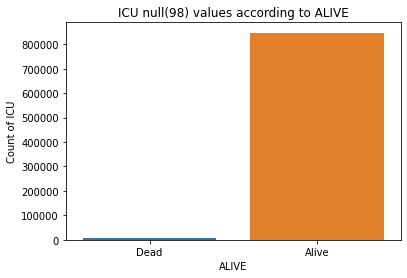

In [17]:
plt.figure()
bar=sns.barplot(x=data.ALIVE[(data.ICU==98)].value_counts().index,y=data.ALIVE[(data.ICU==98)].value_counts().values)
bar.set(title="ICU null(98) values ​​according to ALIVE",xticklabels=(["Dead","Alive"]),ylabel="Count of ICU",xlabel="ALIVE")
plt.show()

* In this column, the alive values ​​are 1 and there are an average of 800 thousand null values. So we can delete this column completely.

In [18]:
data.drop(columns=["ICU"],inplace=True)
null_or_non_zero_list.remove("ICU")

#### Now that we're done with large nulls, let's get rid of low-value nulls.

In [19]:
for i in null_or_non_zero_list:
    data.drop(data[data[i]==98].index,inplace=True)
data.reset_index(inplace=True,drop=True)

<a id ="4"></a>
# Data Visualization

#### Let's compare some futures by survival

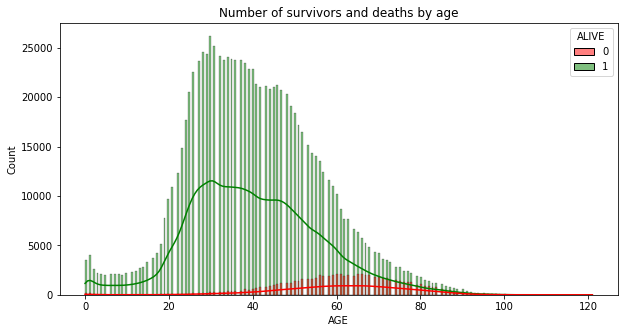

In [20]:
plt.figure(figsize=(10,5))
sns.histplot(x=data.AGE,hue=data.ALIVE,legend=True,palette=["red","green"],kde=True).set(title="Number of survivors and deaths by age")
plt.show()

* Since the data is unbalanced, the number of survivors is higher, but we can understand from that the average age of the deceased is higher than the survivors.

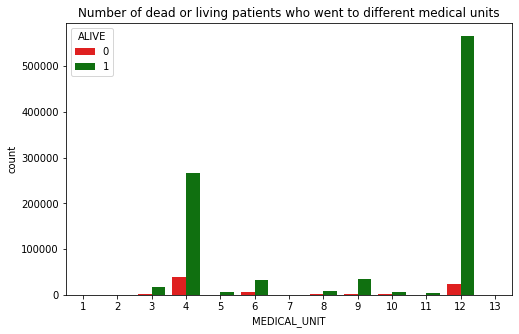

In [21]:
plt.figure(figsize=(8,5))
sns.countplot(x=data.MEDICAL_UNIT,hue=data.ALIVE,palette=["red","green"]).set(title="Number of dead or living patients who went to different medical units")
plt.show()

* As can be seen from the patients who went to medical units 4 and 12, as the medical unit improves, survival rates increase and deaths decrease.(etc. 4= Cottage hospital, 12= Hospital)

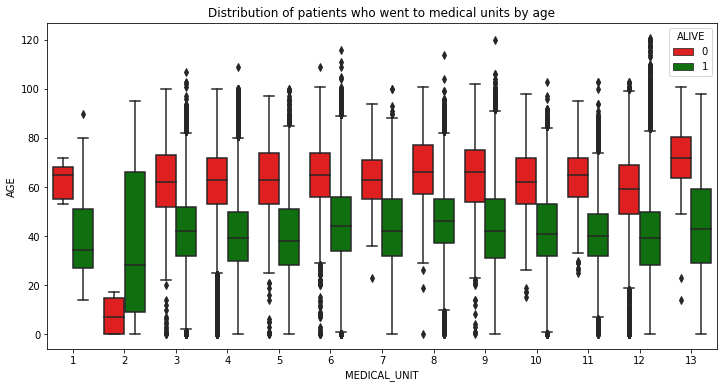

In [22]:
plt.figure(figsize=(12,6))
sns.boxplot(x=data.MEDICAL_UNIT,y=data.AGE,hue=data.ALIVE,palette=["red","green"]).set(title="Distribution of patients who went to medical units by age")
plt.show()

* The median values ​​of people who died and lived, who went to different medical units, do not change that much. Here we see that survival is proportional to age.

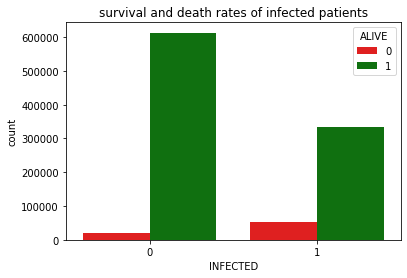

In [23]:
plt.figure()
sns.countplot(x=data.INFECTED,hue=data.ALIVE,palette=["red","green"]).set(title="survival and death rates of infected patients")
plt.show()

* In this graph, we see that the chance of dying of an infected person is higher than a healthy person.

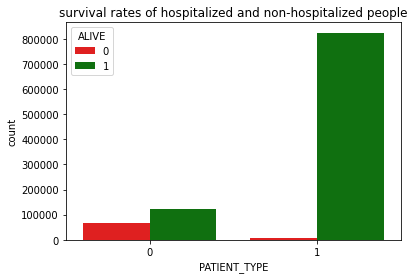

In [24]:
plt.figure()
sns.countplot(x=data.PATIENT_TYPE,hue=data.ALIVE,palette=["red","green"]).set(title="survival rates of hospitalized and non-hospitalized people")
plt.show()

* People who are hospitalized have a higher chance of survival

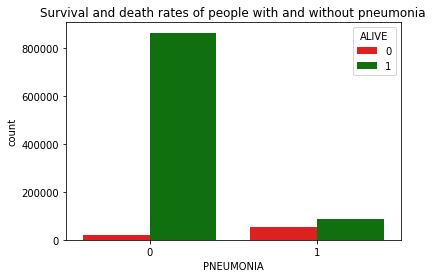

In [25]:
plt.figure()
sns.countplot(x=data.PNEUMONIA,hue=data.ALIVE,palette=["red","green"]).set(title="Survival and death rates of people with and without pneumonia")
plt.show()

* People with pneumonia have an average chance of dying with an older person.

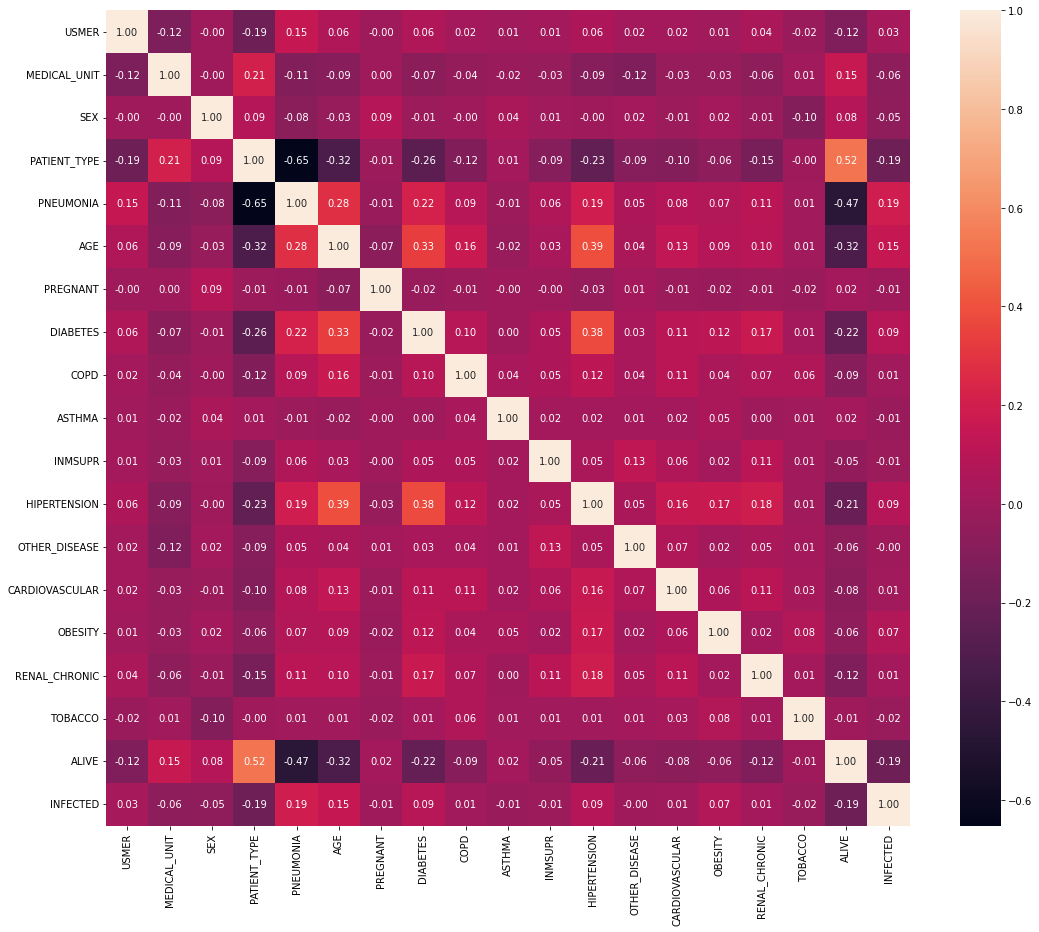

In [26]:
plt.figure(figsize=(18,15))
sns.heatmap(data.corr(),annot=True, fmt=".2f")
plt.show()

<a id ="5"></a>
# Final checks and preparing data

<a id ="6"></a>
## Check futures

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1021977 entries, 0 to 1021976
Data columns (total 19 columns):
 #   Column          Non-Null Count    Dtype
---  ------          --------------    -----
 0   USMER           1021977 non-null  int64
 1   MEDICAL_UNIT    1021977 non-null  int64
 2   SEX             1021977 non-null  int64
 3   PATIENT_TYPE    1021977 non-null  int64
 4   PNEUMONIA       1021977 non-null  int64
 5   AGE             1021977 non-null  int64
 6   PREGNANT        1021977 non-null  int64
 7   DIABETES        1021977 non-null  int64
 8   COPD            1021977 non-null  int64
 9   ASTHMA          1021977 non-null  int64
 10  INMSUPR         1021977 non-null  int64
 11  HIPERTENSION    1021977 non-null  int64
 12  OTHER_DISEASE   1021977 non-null  int64
 13  CARDIOVASCULAR  1021977 non-null  int64
 14  OBESITY         1021977 non-null  int64
 15  RENAL_CHRONIC   1021977 non-null  int64
 16  TOBACCO         1021977 non-null  int64
 17  ALIVE           1021977 non

In [28]:
for i in data.columns:
    print(data[i].value_counts())
    print("\n")

0    656118
1    365859
Name: USMER, dtype: int64


12    589209
4     306967
6      37791
9      37142
3      18646
8      10091
10      7538
5       7049
11      5553
7        870
13       811
2        159
1        151
Name: MEDICAL_UNIT, dtype: int64


0    511936
1    510041
Name: SEX, dtype: int64


1    830385
0    191592
Name: PATIENT_TYPE, dtype: int64


0    884614
1    137363
Name: PNEUMONIA, dtype: int64


30     26456
31     25419
28     24735
29     24595
34     24406
       ...  
115        2
119        2
111        1
121        1
113        1
Name: AGE, Length: 121, dtype: int64


0    1014136
1       7841
Name: PREGNANT, dtype: int64


0    899805
1    122172
Name: DIABETES, dtype: int64


0    1007619
1      14358
Name: COPD, dtype: int64


0    991561
1     30416
Name: ASTHMA, dtype: int64


0    1008419
1      13558
Name: INMSUPR, dtype: int64


0    862715
1    159262
Name: HIPERTENSION, dtype: int64


0    994893
1     27084
Name: OTHER_DISEASE, dtype: int64


0   

<a id ="7"></a>
## Scaling Data
#### There are 2 futures (MEDICAL_UNIT and AGE) without logic in our data. Let's normalize them and prepare our data.

In [29]:
"""normalize_list=["AGE","MEDICAL_UNIT"]
for i in normalize_list:
    data[i]=(data[i]-np.min(data[i]))/(np.max(data[i])-np.min(data[i]))"""
  
scaler = RobustScaler()
data.AGE = scaler.fit_transform(data.AGE.values.reshape(-1,1))
data.MEDICAL_UNIT=scaler.fit_transform(data.MEDICAL_UNIT.values.reshape(-1,1))

*  The robustscaler function makes better distinctions to the machine learning algorithm than the normalization above. You can try.

<a id ="8"></a>
## Separating labels and futures

In [30]:
x=data.drop(columns="ALIVE")
y=data.ALIVE

<a id ="9"></a>
# Train test splits and get balance the data

## Two different methods can be used here to balance the data. Either we multiply those with alive values ​​of 0, or we balance those with a alive value of 1 with 0.

In [31]:
#x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

"""ros=RandomOverSampler(random_state=42)
x_ros,y_ros=ros.fit_resample(x, y)
x_train,x_test,y_train,y_test=train_test_split(x_ros,y_ros,test_size=0.2,random_state=42)"""

rus=RandomUnderSampler(random_state=42)
x_rus,y_rus=rus.fit_resample(x, y)
x_train,x_test,y_train,y_test=train_test_split(x_rus,y_rus,test_size=0.2,random_state=42)

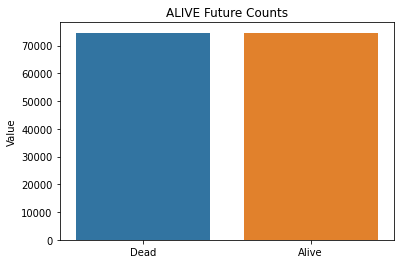

In [32]:
plt.figure()
sns.barplot(y_rus.value_counts().index,y_rus.value_counts().values).set(title="ALIVE Future Counts",xticklabels=(["Dead","Alive"]),ylabel="Value")
plt.show()

<a id ="10"></a>
# Machine Learning

<a id ="11"></a>
### Logistic Regression

In [33]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
print("Logistic Regression Accuracy: ",lr.score(x_test,y_test))

Logistic Regression Accuracy:  0.9049994977061916


Logistic Regression F1 Score:  [0.90604405 0.90393146]
Logistic Regression R2 Score:  0.6199949121742289


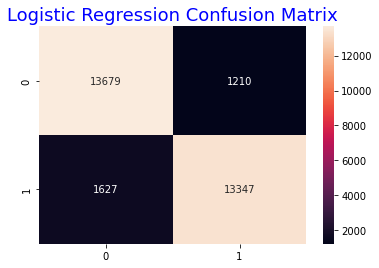

In [34]:
print("Logistic Regression F1 Score: ",f1_score(y_test,lr.predict(x_test),average=None))
print("Logistic Regression R2 Score: ",r2_score(y_test,lr.predict(x_test)))
plt.figure()
sns.heatmap(confusion_matrix(y_test, lr.predict(x_test)), annot=True, fmt=".0f")
plt.title("Logistic Regression Confusion Matrix",fontsize=18, color="b")
plt.show()

<a id ="12"></a>
### KNN

In [35]:
#n=3
#knn=KNeighborsClassifier(n_neighbors=n,n_jobs=-1)
#knn.fit(x_train,y_train)
#prediction=knn.predict(x_test)
#print("{}nn Score: {}".format(n,knn.score(x_test,y_test)))
#print("KNN F1 Score: ",f1_score(y_test,knn.predict(x_test),average=None))
#print("KNN R2 Score: ",r2_score(y_test,knn.predict(x_test)))

* if you dont want to wait here is knn results;

* 3nn Score: 0.8955228878545357
* KNN F1 Score:  [0.89728733 0.89369676]
* KNN R2 Score:  0.5820881656621762

<a id ="13"></a>
### Decision Tree

In [36]:
dt=DecisionTreeClassifier(random_state=42)
dt.fit(x_train,y_train)
print("Decision Tree Score: ",dt.score(x_test,y_test))
print("Decision Tree F1 Score: ",f1_score(y_test,dt.predict(x_test),average=None))
print("Decision Tree R2 Score: ",r2_score(y_test,dt.predict(x_test)))

Decision Tree Score:  0.8843384790543481
Decision Tree F1 Score:  [0.8861794  0.88243703]
Decision Tree R2 Score:  0.5373501680119093


<a id ="14"></a>
### Random Forest

In [37]:
rf=RandomForestClassifier(n_estimators=4,random_state=42)
rf.fit(x_train,y_train)
print("Random Forest Score: ",rf.score(x_test,y_test))
print("Random Forest F1 Score: ",f1_score(y_test,rf.predict(x_test),average=None))
print("Random Forest R2 Score: ",r2_score(y_test,rf.predict(x_test)))

Random Forest Score:  0.8939155476676824
Random Forest F1 Score:  [0.89694209 0.89070586]
Random Forest R2 Score:  0.5756587528262098


<a id ="15"></a>
### Naive Base

In [38]:
nb=GaussianNB()
nb.fit(x_train,y_train)
print("Naive Base Score: ",nb.score(x_test,y_test))
print("Naive Base F1 Score: ",f1_score(y_test,nb.predict(x_test),average=None))
print("Naive Base R2 Score: ",r2_score(y_test,nb.predict(x_test)))

Naive Base Score:  0.8722164551451629
Naive Base F1 Score:  [0.87307078 0.87135055]
Naive Base R2 Score:  0.48886167954066173


<a id ="16"></a>
### K Fold Cross Validation with Logistic Regression

In [39]:
accuracies=cross_val_score(estimator=lr,X=x_train,y=y_train,cv=10,n_jobs=-1)
print("Average accuracy: ",np.mean(accuracies))
print("Average std: ",np.std(accuracies))

lr.fit(x_train,y_train)
print("Logistic Regression test Accuracy",lr.score(x_test,y_test))

Average accuracy:  0.9066228255978469
Average std:  0.0023165806827295686
Logistic Regression test Accuracy 0.9049994977061916


<a id ="17"></a>
### Grid Search Cross Validation with Logistic Regression

In [40]:
grid={"C":np.logspace(-3,3,7),"penalty":["l1","l2"]}
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10,n_jobs=-1,verbose=1)
logreg_cv.fit(x,y)

print("Optimized hyperparameters: ",logreg_cv.best_params_)
print("accuracy: ",logreg_cv.best_score_)

Fitting 10 folds for each of 14 candidates, totalling 140 fits
Optimized hyperparameters:  {'C': 0.001, 'penalty': 'l2'}
accuracy:  0.9241392356517268


<a id ="23"></a>
# Conclusion
> * In the Covid data set, we first examined our data and determined the null values ​​in it.
> * By separating classifiable futures, we created new futures and dropped the old ones.
> * We did a little data analysis to avoid losing null values.
> * We visualized our data and made inferences about them.
> * Finally, we tested them using different machine laerning algorithms.



**Thank you for your upvote and follow. :)**
